# Credit EDA Case Study

## Problem Statement : 

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyze the patterns present in the data. This will ensure that the applicants capable of repaying the loans are not rejected.
    
The company wants to understand the driving factors (or driver variables) behind loan defaults, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment.

In [1]:
# Import warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [3]:
# To read the dataframe

application_df = pd.read_csv("application_data.csv")
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Inspect the dataframe

In [4]:
# To check the number of rows and columns in the dataframe

application_df.shape

(307511, 122)

#### There are 307511 rows and 122 columns in the dataframe.

In [5]:
# To identify the data type of columns

application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### 65 columns have 'float64' data type, 41 columns have 'int64' data type and 16 columns have 'object' data type.

In [6]:
# To describe the statistics of the each column

application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Identify the missing data

In [7]:
# Count the null values of the columns in the dataframe

pd.set_option("max_rows",None)
pd.set_option("max_column",None)
application_df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
# Count the percentage of null values of the columns in the dataframe

(application_df.isnull().sum()*100/len(application_df)).sort_values(ascending = False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

### We are dropping the columns in a dataframe which has missing values greater than 50%

In [9]:
application_df = application_df.drop(application_df.columns[application_df.isnull().mean() > 0.5], axis = 1)
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Check the null percentage of columns after dropping the columns

In [10]:
(application_df.isnull().sum()*100/len(application_df)).sort_values(ascending=False)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

## Drop Unwanted Columns

In [11]:
Unwanted_Columns = ['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
    'FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE',
    'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21','FLAG_OWN_CAR','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']

application_df = application_df.drop(labels = Unwanted_Columns, axis=1)
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
application_df.shape

(307511, 51)

Now we have 51 columns in our dataframe

In [13]:
# To check the percentage of column wise null values

(application_df.isnull().sum()*100/len(application_df)).sort_values(ascending = False)

FLOORSMAX_MEDI                  49.760822
FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0.003902
CNT_FAM_MEMBERS                  0.000650
CODE_GENDER                      0

### Imputing the null values

we can impute the missing values in the appication dataframe. For the continuous variable we can impute values by two ways i.e. Mean imputation and median imputation. We have to perform mean imputation where there are no ouliers in the column and we have to perform median imputation where there are outliers in the column. For the categorical variable we have to perform mode imputation.

We can impute the mean values for the following columns: 
- 'AMT_REQ_CREDIT_BUREAU_YEAR'
- 'AMT_REQ_CREDIT_BUREAU_QRT'
- 'AMT_REQ_CREDIT_BUREAU_HOUR'
- 'AMT_REQ_CREDIT_BUREAU_DAY'
- 'AMT_REQ_CREDIT_BUREAU_WEEK'
- 'AMT_REQ_CREDIT_BUREAU_MON'

In [14]:
# For the 'AMT_REQ_CREDIT_BUREAU_YEAR' column we will impute the null values by the mean.

application_df['AMT_REQ_CREDIT_BUREAU_YEAR'] = application_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application_df["AMT_REQ_CREDIT_BUREAU_YEAR"].mean())


#Check again the percentage of null values after imputing the values in 'AMT_REQ_CREDIT_BUREAU_YEAR' column
(application_df.isnull().sum() * 100/ len(application_df)).sort_values(ascending=False)

FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_AVG                   49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0.003902
CNT_FAM_MEMBERS                  0.000650
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0

### Check data types

In [15]:
#To do futher analysis create dataframe by casting all numeric continous variables

application_df_num = application_df.select_dtypes(np.number)
application_df_num.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.000000
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,2.0,2,2,17,0,0,0,0,0,0,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,1.899974
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1.0,2,2,11,0,0,0,0,1,1,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


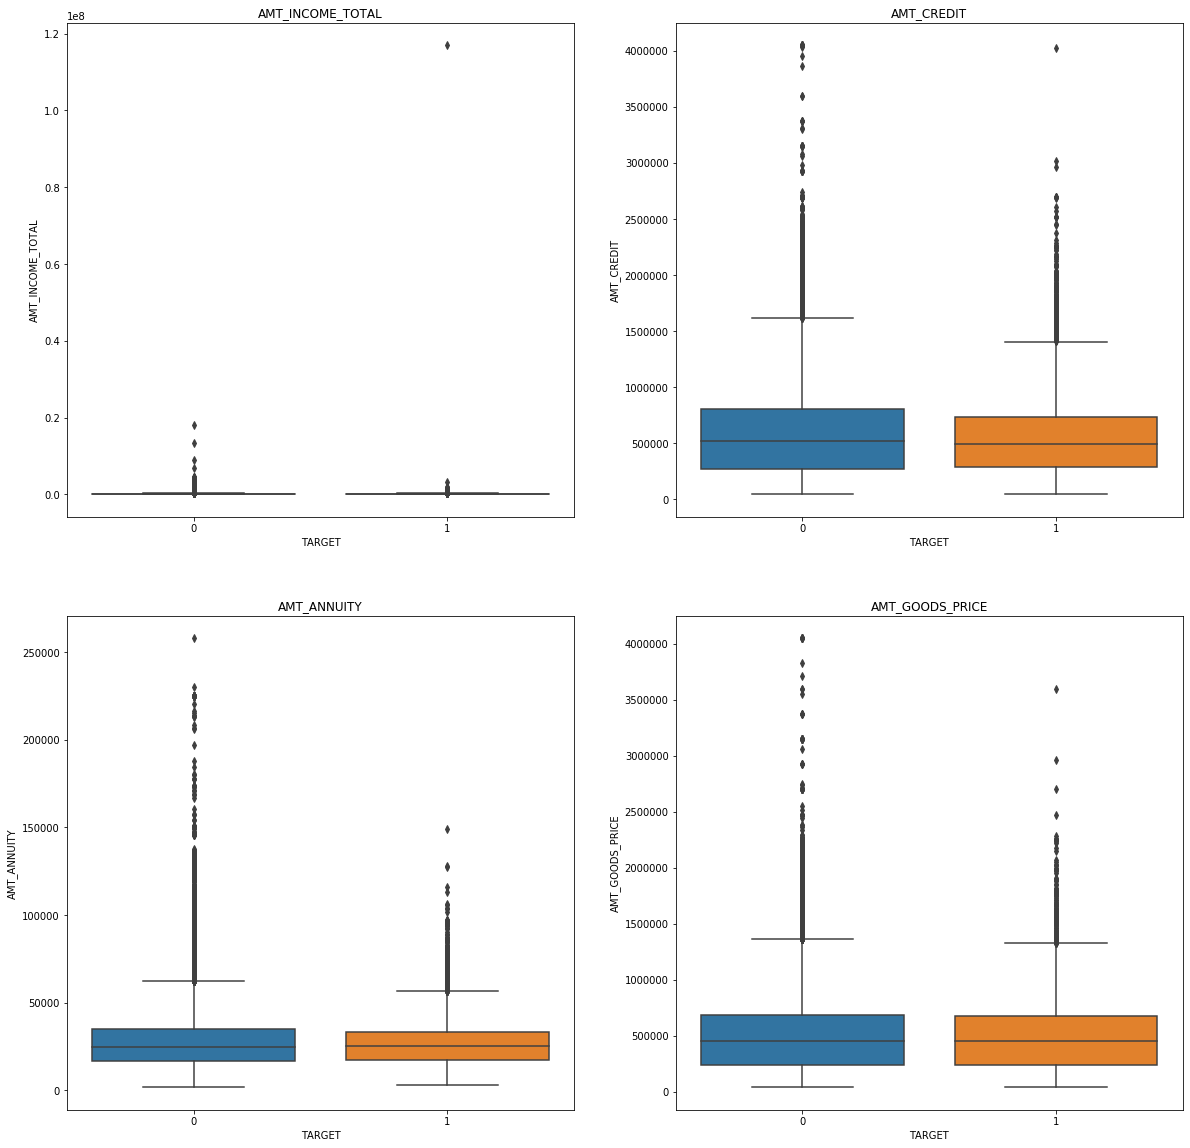

In [16]:
# For numerical columns we will check for outliers and report them for at-least 3 variables. 
# Treat and analyse them. Here we are checking outliers for following numerical variables ageing target (0,1)
# (AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY and AMT_GOODS_PRICE)

def Outliers_of_Plot():
    fig, axes = plt.subplots(nrows=2, ncols = 2, figsize=(20,20))

    sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data = application_df, ax=axes[0][0])
    axes[0][0].set_title('AMT_INCOME_TOTAL')

    sns.boxplot(x="TARGET", y="AMT_CREDIT", data = application_df, ax=axes[0][1])
    axes[0][1].set_title('AMT_CREDIT')

    sns.boxplot(x="TARGET", y="AMT_ANNUITY", data = application_df, ax=axes[1][0])
    axes[1][0].set_title('AMT_ANNUITY')

    sns.boxplot(x="TARGET", y="AMT_GOODS_PRICE", data = application_df, ax=axes[1][1])
    axes[1][1].set_title('AMT_GOODS_PRICE')
    
Outliers_of_Plot()

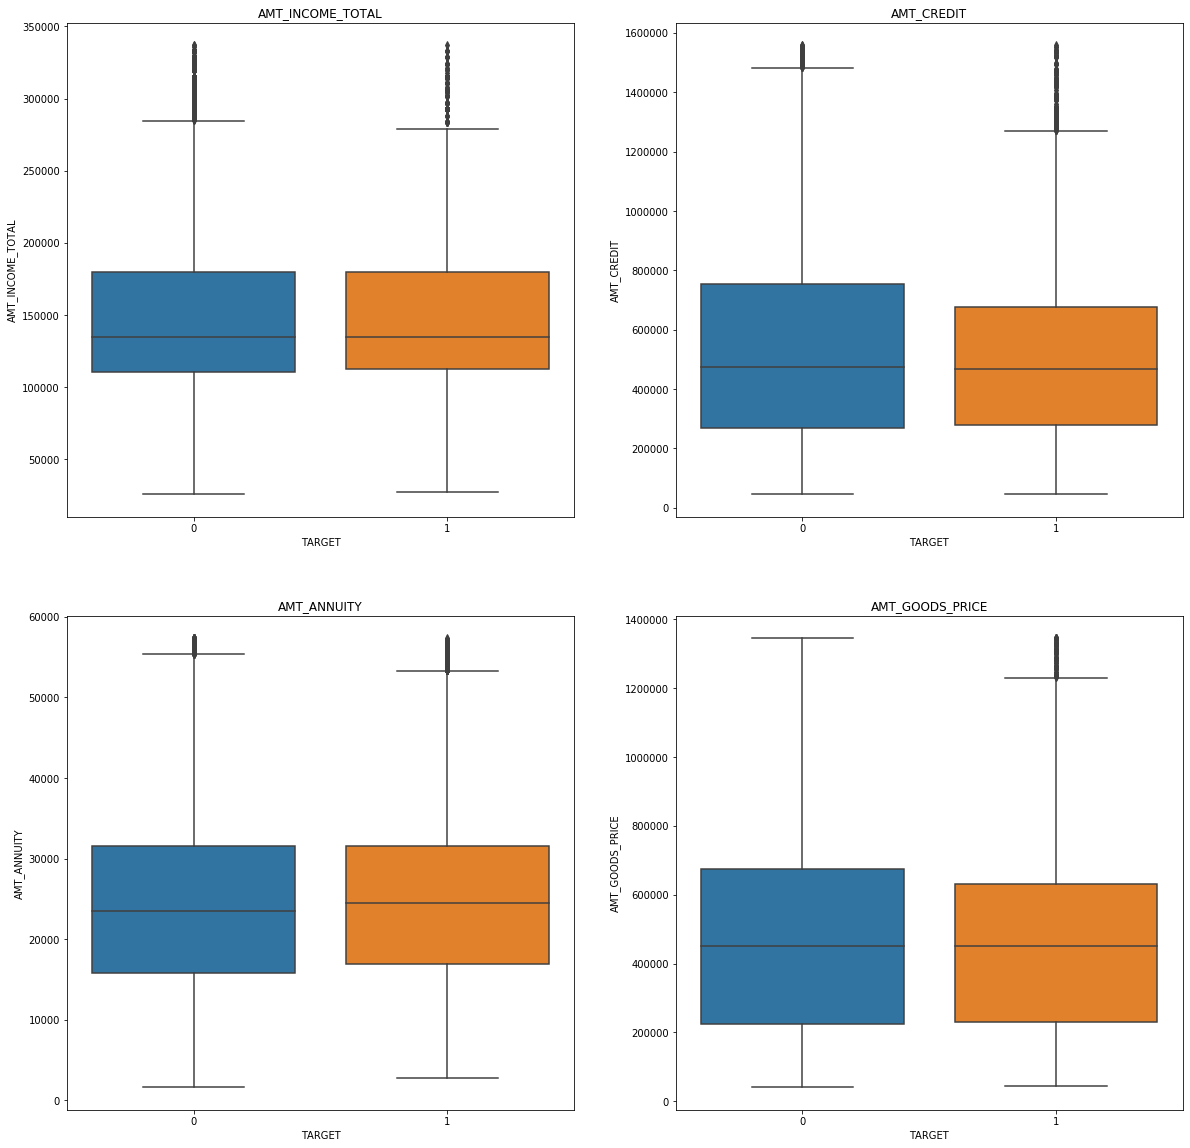

In [17]:
# Treat the outliers using Interquartile range (IQR)

Outlier_Variables = ['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

# We are creating the function to calculate Interquartile range
def cleaned_outlier(temp, col_name):
    Q1  = temp[col_name].quantile(0.25)
    Q3  = temp[col_name].quantile(0.75)
    IQR = Q3-Q1 

    df_3 = temp.loc[(temp[col_name] > (Q1 - 1.5 * IQR)) & (temp[col_name] < (Q3 + 1.5 * IQR))]
    return df_3

for item in Outlier_Variables:
    application_df = cleaned_outlier(application_df,item)
    
#Plot the outliers again    
Outliers_of_Plot()

The graph is much clearer after trating the outliers.

In [18]:
application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOT

## Binning of Continous Variable

In [19]:
# Age calculation from the column "DAYS_BIRTH".
# Describe statistics of each coloumn to start binning

application_df['Age'] = ((application_df['DAYS_BIRTH']*-1)/365)
application_df['Age']= application_df['Age'].astype(int)

print(application_df.Age.describe().apply(lambda x: format(x, 'f')),"\n")

print(application_df.AMT_CREDIT.describe().apply(lambda x: format(x, 'f')),"\n")

print(application_df.AMT_INCOME_TOTAL.describe().apply(lambda x: format(x, 'f')))

count    276211.000000
mean         43.433172
std          12.118172
min          20.000000
25%          33.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: Age, dtype: object 

count     276211.000000
mean      530042.160490
std       318159.962101
min        45000.000000
25%       269550.000000
50%       472500.000000
75%       753840.000000
max      1558813.500000
Name: AMT_CREDIT, dtype: object 

count    276211.000000
mean     149858.080386
std       61032.085769
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      180000.000000
max      337050.000000
Name: AMT_INCOME_TOTAL, dtype: object


In [20]:
# We are creating bins for age 

bins=[0,20,30,40,50,60,70]
Age_Group=['0-20','20-30','30-40','40-50','50-60','60 and above']
application_df['Age_Bin'] = pd.cut(application_df['Age'], bins, labels = Age_Group)

# We are creating bins for credit amount

bins=[0,230000,460000,690000,920000,1150000,1380000,1600000]
Range_Period=['0-230000','230000-460000','460000-690000','690000-920000','920000-1150000','1150000-1380000','1380000-1610000']
application_df['Credit_Amount_Range']=pd.cut(application_df['AMT_CREDIT'],bins,labels=Range_Period)

# We are creating bins for the income amount

bins=[0,50000,105000,200000,205000,300000,305000,400000]
Range_period=['0-50000','50000-105000','105000-200000','200000-205000','205000-300000','300000-305000','305000 and above']
application_df['Income_Amount_Range']=pd.cut(application_df['AMT_INCOME_TOTAL'],bins,labels=Range_period)

application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Age_Bin,Credit_Amount_Range,Income_Amount_Range
0,100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.000000,25,20-30,230000-460000,200000-205000
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,45,40-50,1150000-1380000,205000-300000
2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,52,50-60,0-230000,50000-105000
3,100006,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,1.899974,52,50-60,230000-460000,105000-200000
4,100007,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,54,50-60,460000-690000,105000-200000


In [21]:
# We wre  checking the total count of target value as 0 and 1.

Target_df = pd.value_counts(application_df['TARGET'],sort=True)
Target_df

0    253082
1     23129
Name: TARGET, dtype: int64

In [22]:
# We are calculating Imbalance percentage
    
# Since the target0 is major and target1 is minor

Target_Percentage = 100*application_df.TARGET.value_counts()/len(application_df)
Target_Percentage

0    91.626329
1     8.373671
Name: TARGET, dtype: float64

% other  91.6263291469203
% difficuties 8.37367085307971


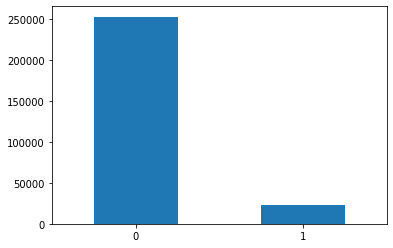

In [23]:
Target_df.plot(kind='bar',rot=0)

print("% other ",(Target_df[0]/application_df.shape[0])*100)
print("% difficuties",(Target_df[1]/application_df.shape[0])*100)

In [24]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target_1 = application_df.loc[application_df['TARGET']==1]
target_0 = application_df.loc[application_df['TARGET']==0].sample(n=int(Target_df[1]),random_state=42)

## Univariate Analysis and multivariate analysis

### Univariate analysis using continuous variable

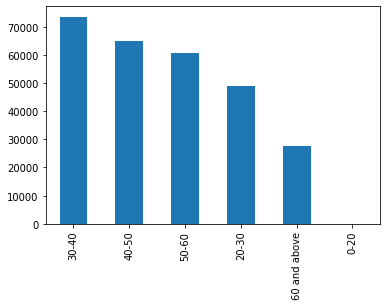

In [25]:
# We are plotting a bar graph of total people of different ages

application_df['Age_Bin'].value_counts().plot(kind = 'bar')
plt.show()

Highest number of people have applied in the age group of 30-40

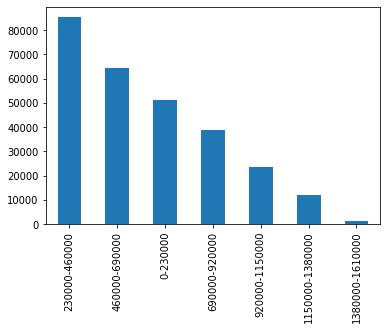

In [26]:
# we are plotting a bar graph of credit amount range

application_df['Credit_Amount_Range'].value_counts().plot(kind = 'bar')
plt.show()

Maximum credit is applied in the range of 230000-460000

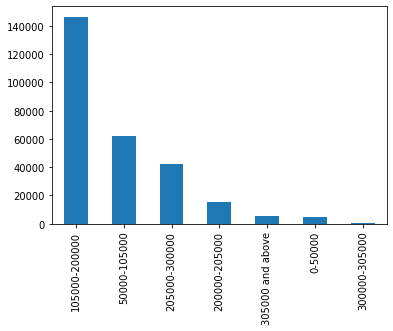

In [27]:
# We are plotting a bar graph of income amount range

application_df['Income_Amount_Range'].value_counts().plot(kind = 'bar')
plt.show()

Maximum people have the income in the range of 105000-200000. It means that the people with income range of 105000-200000 have applied for the loan.

### Univariate analysis using categorical variable

            INCOME_TYPE  Total
0  Commercial associate   4751
1       Maternity leave      1
2             Pensioner   2829
3         State servant   1144
4            Unemployed      8
5               Working  14396 



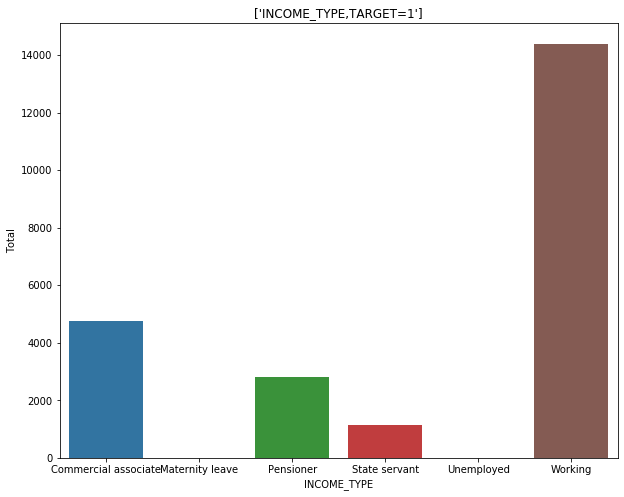

In [28]:
# We are calculate the total count of each INCOME_TYPE which with TARGET value as 1

def got_df(col,col_rename,Target_df):
    freqn_df = Target_df.groupby(col).size().reset_index(name='Total').rename(columns={col:col_rename})
    print(freqn_df,"\n")
    return freqn_df

def get_free(col,col_rename,x,y,Target_df,targetnum,title):
    freqn_df=got_df(col,col_rename,Target_df)
    plt.figure(figsize=(x,y))
    ax=sns.barplot(x=col_rename,y='Total',data=freqn_df)
       
    plt.title([title])
    plt.show()

get_free('NAME_INCOME_TYPE','INCOME_TYPE',10,8,target_1,1,'INCOME_TYPE,TARGET=1')

Maximum payment difficulties are from the working peopole

            INCOME_TYPE  Total
0           Businessman      1
1  Commercial associate   5059
2             Pensioner   4453
3         State servant   1599
4               Student      1
5               Working  12016 



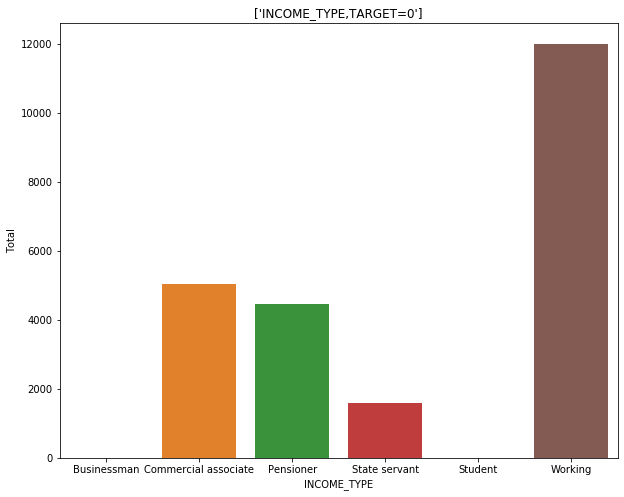

In [29]:
# We are plotting the graph of the count of the INCOME_TYPE which having TARGET value as 0

get_free('NAME_INCOME_TYPE','INCOME_TYPE',10,8,target_0,0,'INCOME_TYPE,TARGET=0')

          FAMILY_STATUS  Total
0        Civil marriage   2800
1               Married  13704
2             Separated   1502
3  Single / not married   4225
4                 Widow    898 



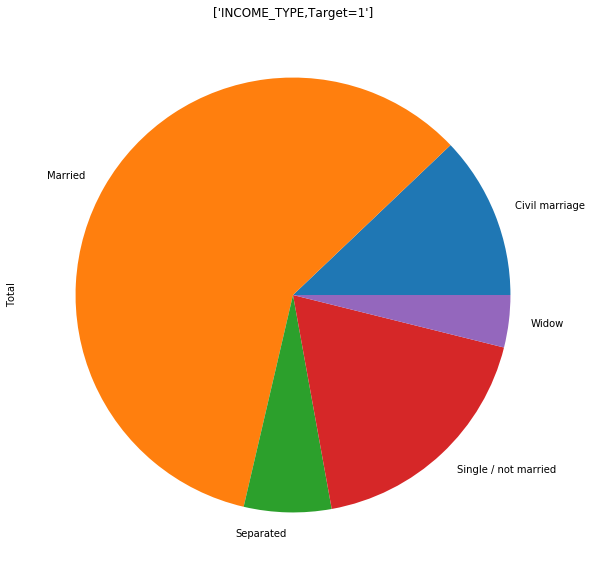

In [30]:
# We are plotting the pie-chart of the count of the INCOME_TYPE which having TARGET value as 1 

freqn_table_2 = got_df('NAME_FAMILY_STATUS','FAMILY_STATUS',target_1)
plt.figure(figsize=(10,10))
freqn_table_2['Total'].groupby(freqn_table_2.FAMILY_STATUS).sum().plot(kind="pie")
plt.title(['INCOME_TYPE,Target=1'])
plt.show()

          FAMILY_STATUS  Total
0        Civil marriage   2289
1               Married  14581
2             Separated   1526
3  Single / not married   3418
4                 Widow   1315 



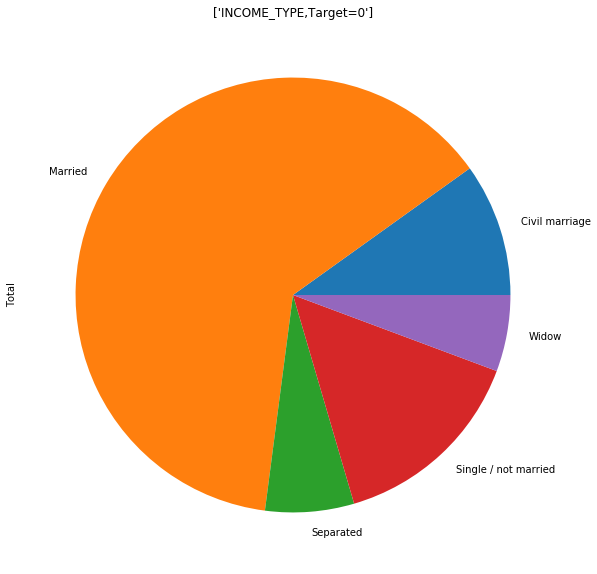

In [31]:
# We are plotting the pie-chart of the count of the INCOME_TYPE which having TARGET value as 0

freqn_table_2=got_df('NAME_FAMILY_STATUS','FAMILY_STATUS',target_0)
plt.figure(figsize=(10,10))
freqn_table_2['Total'].groupby(freqn_table_2.FAMILY_STATUS).sum().plot(kind="pie")
plt.title(['INCOME_TYPE,Target=0'])
plt.show()

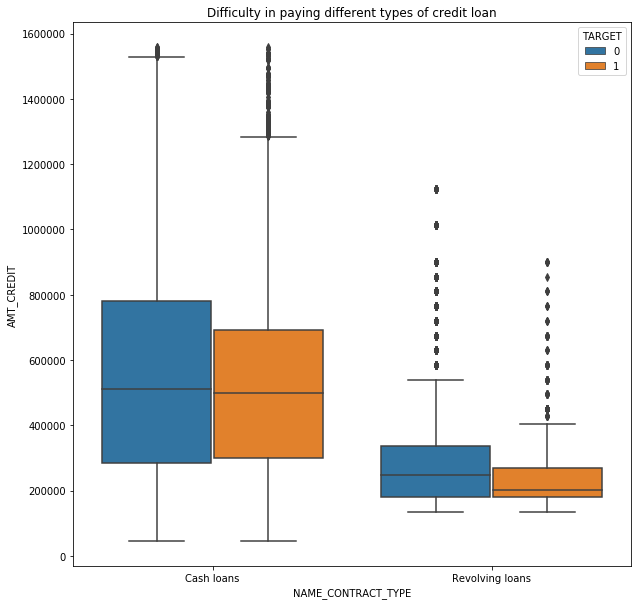

In [32]:
# We are plotting the boxplot 

plt.figure(figsize=(10,10))

sns.boxplot(data=application_df,x='NAME_CONTRACT_TYPE',y='AMT_CREDIT',hue='TARGET')
plt.title('Difficulty in paying different types of credit loan')
plt.show()

In [33]:
# We are performing correlation between CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE and REGION_POPULATION_RELATIVE
# And then we will make correlation matrix

Columns=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE']
Corr=target_1[Columns].corr()
Corr.style.background_gradient(cmap='coolwarm')

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE
CNT_CHILDREN,1.000000,-0.005366,0.005275,-0.001925,-0.030839
AMT_INCOME_TOTAL,-0.005366,1.000000,0.300632,0.300955,0.081046
AMT_CREDIT,0.005275,0.300632,1.000000,0.978329,0.051605
AMT_GOODS_PRICE,-0.001925,0.300955,0.978329,1.000000,0.060408
REGION_POPULATION_RELATIVE,-0.030839,0.081046,0.051605,0.060408,1.000000


Observation of the correlation matrix wih respect to Target=1

A. high Correlation Columns
- AMT_GOODS_PRICE and AMT_CREDIT

B. Medium Correlation Columns
- REGION_POPULATION_RELATIVE and AMT_INCOME_TOTAL
- REGION_POPULATION_RELATIVE and AMT_GOODS_PRICE
- REGION_POPULATION_RELATIVE and AMT_CREDIT

C. Low Correlation Columns
- AMT_INCOME_TOTAL and CNT_CHILDREN

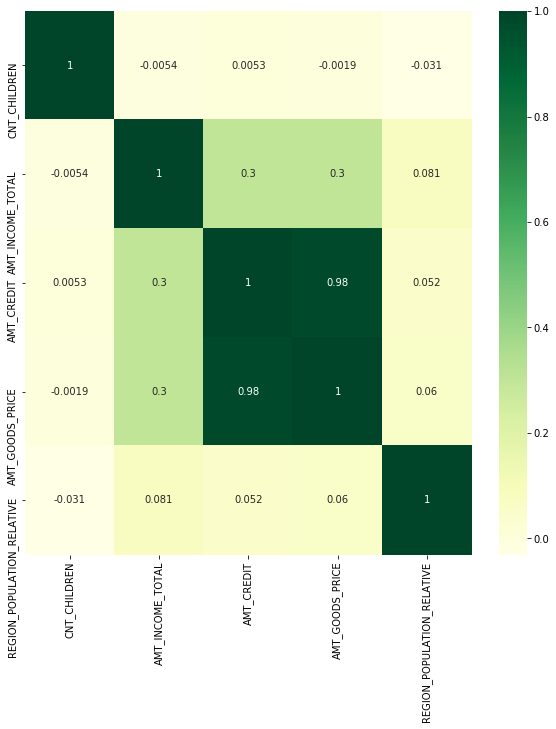

In [34]:
# For better presentation we will plot the heatmap between numerical coluns correspond to the Target=1

plt.figure(figsize=(10,10))
sns.heatmap(target_1[Columns].corr(), annot=True,cmap="YlGn")
plt.show()

### Now we will perform correlation between numerical columns for Target=0

In [35]:
Corr=target_0[Columns].corr()
Corr.style.background_gradient(cmap='coolwarm')

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE
CNT_CHILDREN,1.000000,0.029341,0.014884,0.010737,-0.037506
AMT_INCOME_TOTAL,0.029341,1.000000,0.323096,0.324393,0.121926
AMT_CREDIT,0.014884,0.323096,1.000000,0.981905,0.040033
AMT_GOODS_PRICE,0.010737,0.324393,0.981905,1.000000,0.043510
REGION_POPULATION_RELATIVE,-0.037506,0.121926,0.040033,0.043510,1.000000


Observation of the correlation matrix wih respect to Target=0

A. high Correlation Columns
- AMT_GOODS_PRICE and AMT_CREDIT

B. Medium Correlation Columns
- AMT_INCOME_TOTAL and AMT_CREDIT
- AMT_INCOME_TOTAL and AMT_GOODS_PRICE

C. Low Correlation Columns
- AMT_GOODS_PRICE and CNT_CHILDREN

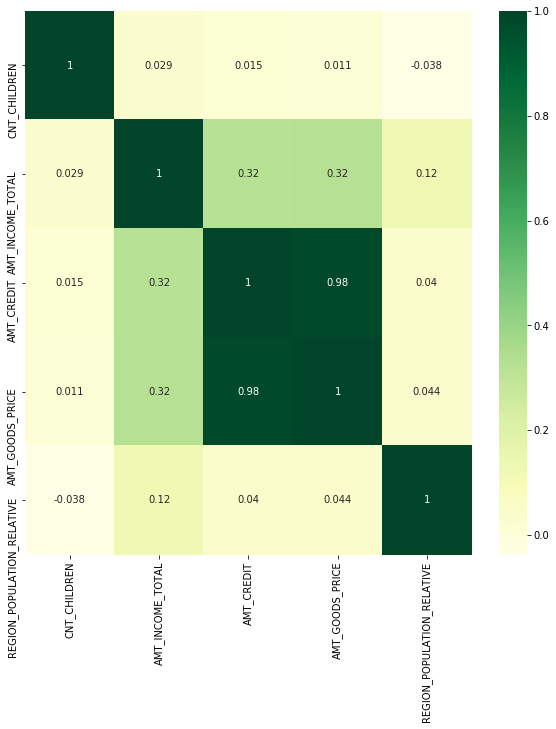

In [36]:
# For better presentation we will plot the heatmap between numerical coluns correspond to the Target=0

plt.figure(figsize=(10,10))
sns.heatmap(target_0[Columns].corr(), annot=True,cmap="YlGn")
plt.show()

Here we can see that high correlation is same for the target=0 and target=1

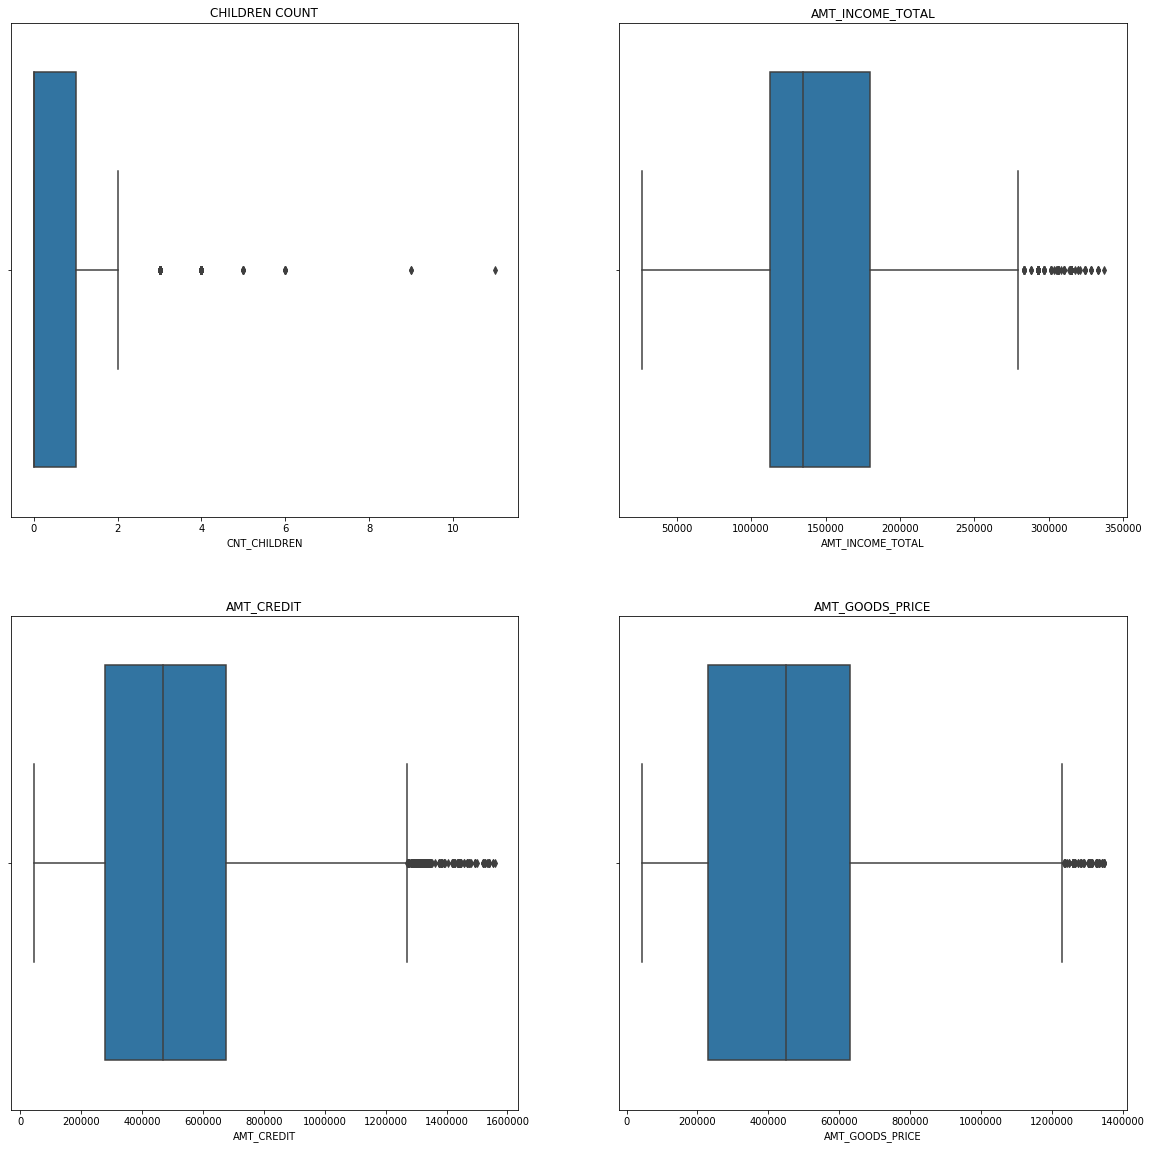

In [37]:
# We are plotting box plot for the numerical columns having Target=1

plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.title('CHILDREN COUNT')
sns.boxplot(target_1['CNT_CHILDREN'])

plt.subplot(2,2,2)
plt.title('AMT_INCOME_TOTAL')
sns.boxplot(target_1['AMT_INCOME_TOTAL'])

plt.subplot(2,2,3)
plt.title('AMT_CREDIT')
sns.boxplot(target_1['AMT_CREDIT'])

plt.subplot(2,2,4)
plt.title('AMT_GOODS_PRICE')
sns.boxplot(target_1['AMT_GOODS_PRICE'])

plt.show()

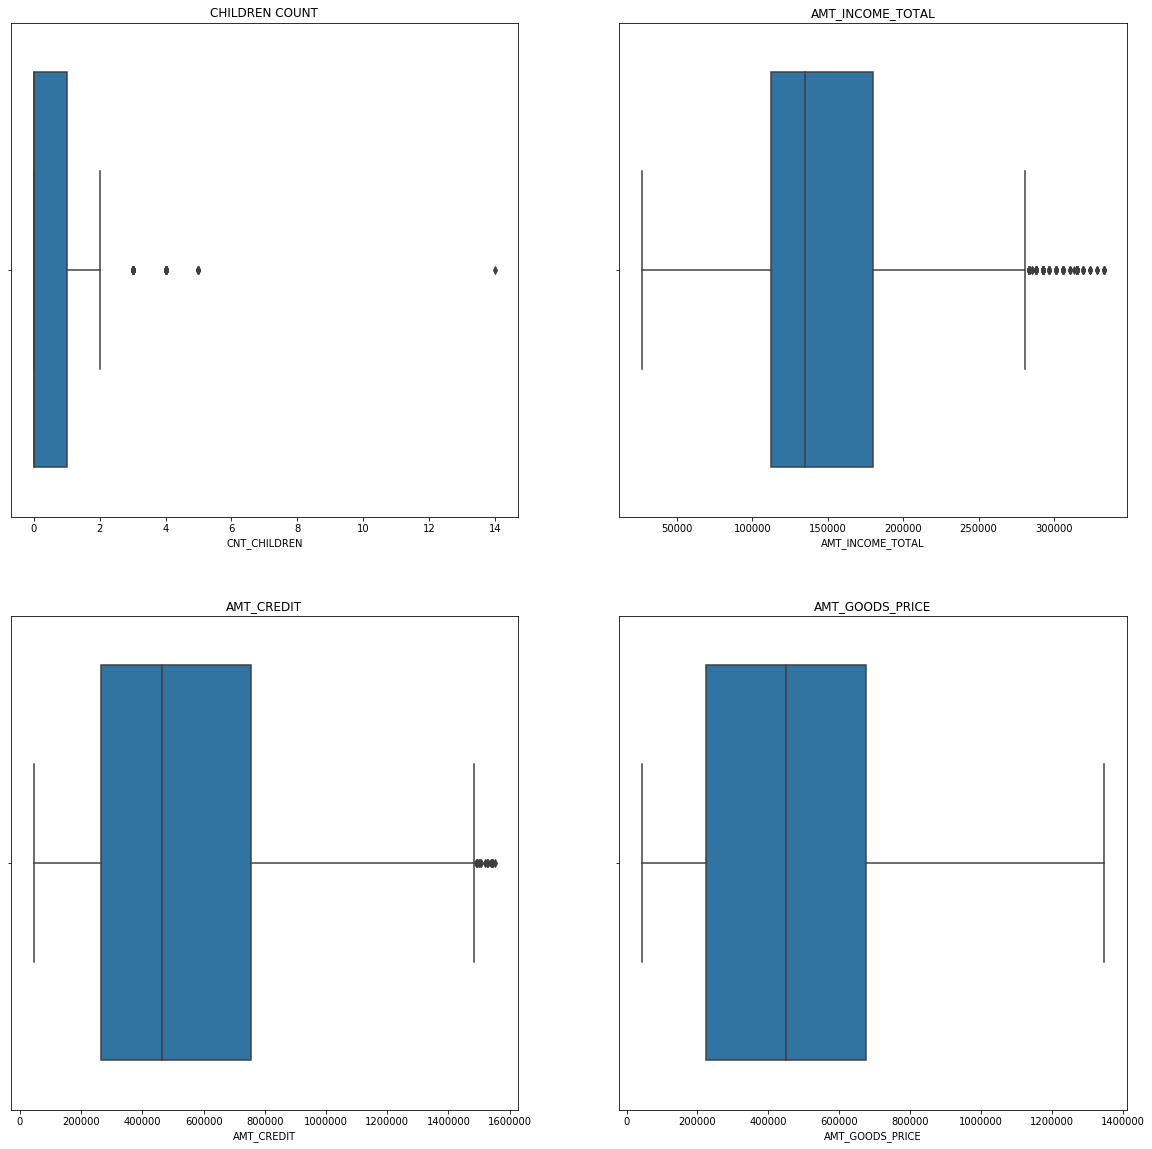

In [38]:
# We are plotting Box plot for the numerical columns having Target=0

plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.title('CHILDREN COUNT')
sns.boxplot(target_0['CNT_CHILDREN'])

plt.subplot(2,2,2)
plt.title('AMT_INCOME_TOTAL')
sns.boxplot(target_0['AMT_INCOME_TOTAL'])

plt.subplot(2,2,3)
plt.title('AMT_CREDIT')
sns.boxplot(target_0['AMT_CREDIT'])

plt.subplot(2,2,4)
plt.title('AMT_GOODS_PRICE')
sns.boxplot(target_0['AMT_GOODS_PRICE'])

plt.show()

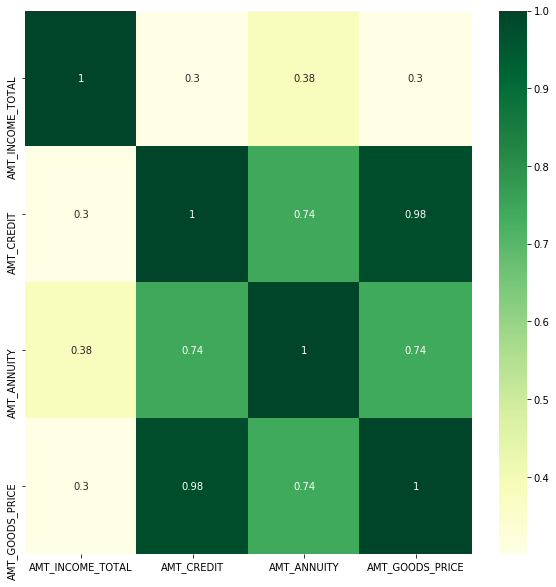

In [39]:
# We are plotting Heat map for the numerical columns having Target=1

plt.figure(figsize=(10,10))
col1=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
sns.heatmap(target_1[col1].corr(), annot=True,cmap="YlGn")
plt.show()

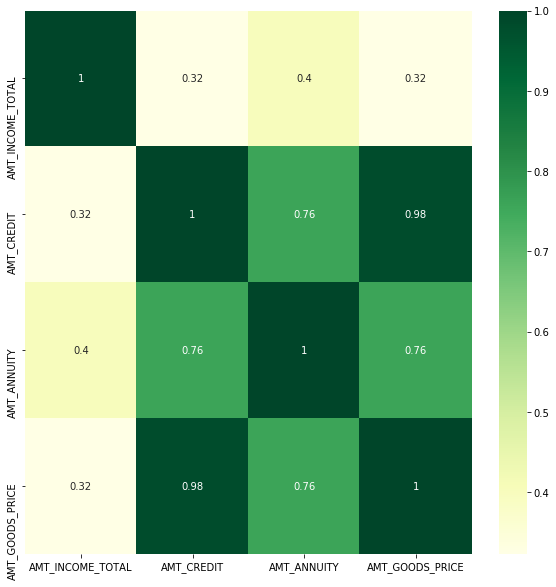

In [40]:
# We are plotting Heat map for numerical columns having Target=0

plt.figure(figsize=(10,10))
col1=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
sns.heatmap(target_0[col1].corr(), annot=True,cmap="YlGn")
plt.show()

### Reading the previous appication dataframe

In [41]:
prvs_application_df = pd.read_csv("previous_application.csv")
prvs_application_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Inspect the previous application dataframe

In [42]:
# To check the number of rows and columns in the dataframe

prvs_application_df.shape

(1670214, 37)

#### There are 1670214 rows and 37 columns in the dataframe

In [43]:
# To identify the data type of columns

application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276211 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    276211 non-null  int64   
 1   TARGET                        276211 non-null  int64   
 2   NAME_CONTRACT_TYPE            276211 non-null  object  
 3   CODE_GENDER                   276211 non-null  object  
 4   FLAG_OWN_REALTY               276211 non-null  object  
 5   CNT_CHILDREN                  276211 non-null  int64   
 6   AMT_INCOME_TOTAL              276211 non-null  float64 
 7   AMT_CREDIT                    276211 non-null  float64 
 8   AMT_ANNUITY                   276211 non-null  float64 
 9   AMT_GOODS_PRICE               276211 non-null  float64 
 10  NAME_TYPE_SUITE               275365 non-null  object  
 11  NAME_INCOME_TYPE              276211 non-null  object  
 12  NAME_EDUCATION_TYPE           

#### 24 columns have 'float64' data type, 16 columns have 'int64' data type, 12 columns have 'object' data type and 3 columns have category data types

In [44]:
# To describe the statistics of the each column

application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
count,276211.000000,276211.000000,276211.000000,276211.000000,2.762110e+05,276211.000000,2.762110e+05,276211.000000,276211.000000,276211.000000,276211.000000,276211.000000,276211.000000,276211.000000,276211.000000,276211.000000,276211.00000,276211.000000,276211.000000,276211.000000,276211.000000,276211.000000,2.755900e+05,220648.000000,138000.000000,135275.000000,138000.000000,135275.000000,138000.000000,135275.000000,139367.000000,275364.000000,275364.000000,238153.000000,238153.000000,238153.000000,238153.00000,238153.000000,276211.000000,276211.000000
mean,278209.101419,0.083737,0.414223,149858.080386,5.300422e+05,24531.625229,4.723816e+05,0.020201,-16035.994870,66665.740130,-5024.828421,-2994.456361,2.141062,2.077086,2.057557,12.003588,0.01328,0.044372,0.035187,0.078809,0.232406,0.180232,5.068228e-01,0.510196,0.977420,0.218872,0.976739,0.215244,0.977429,0.218527,0.098775,1.439491,0.103347,0.006416,0.006987,0.034092,0.25453,0.262844,1.912774,43.433172
std,102809.471026,0.276993,0.720460,61032.085769,3.181600e+05,11170.043614,2.845556e+05,0.012845,4423.884298,143564.105353,3531.980994,1507.225036,0.913180,0.491669,0.485572,3.241401,0.11447,0.205920,0.184252,0.269441,0.422367,0.384381,1.921055e-01,0.195195,0.060628,0.138111,0.066032,0.137336,0.061361,0.138471,0.103295,2.422017,0.368573,0.083895,0.110547,0.203457,0.88210,0.611799,1.740046,12.118172
min,100002.000000,0.000000,0.000000,25650.000000,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25201.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,20.000000
25%,189103.000000,0.000000,0.000000,112500.000000,2.695500e+05,15858.000000,2.250000e+05,0.010006,-19755.000000,-2689.000000,-7530.000000,-4297.000000,2.000000,2.000000,2.000000,10.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.799499e-01,0.368969,0.976700,0.166700,0.976200,0.166700,0.976700,0.166700,0.040200,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,33.000000
50%,278274.000000,0.000000,0.000000,135000.000000,4.725000e+05,23607.000000,4.500000e+05,0.018850,-15735.000000,-1166.000000,-4537.000000,-3255.000000,2.000000,2.000000,2.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.576713e-01,0.535276,0.981600,0.166700,0.981600,0.166700,0.981600,0.166700,0.067500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.899974,43.000000
75%,367060.500000,0.000000,1.000000,180000.000000,7.538400e+05,31608.000000,6.750000e+05,0.026392,-12324.000000,-260.000000,-2059.000000,-1721.000000,3.000000,2.000000,2.000000,14.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,6.577885e-01,0.667458,0.986600,0.333300,0.986600,0.333300,0.986600,0.333300,0.121300,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,54.000000
max,456255.000000,1.000000,19.000000,337050.000000,1.558814e+06,57366.000000,1.345500e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,20.000000,3.000000,3.000000,23.000000,1.00000,1.000000,1.000

In [45]:
# Count the percentage of null values of the columns in the dataframe

(prvs_application_df.isnull().sum()*100/len(prvs_application_df)).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

### We are dropping the columns in a dataframe which has missing values greater than equal to 50%

In [46]:
prvs_application_df = prvs_application_df.drop(prvs_application_df.columns[prvs_application_df.isnull().mean() >= 0.5], axis = 1)
prvs_application_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Check the null percentage of columns after dropping the columns

In [47]:
(prvs_application_df.isnull().sum()*100/len(prvs_application_df)).sort_values(ascending=False)

NAME_TYPE_SUITE                49.119754
DAYS_FIRST_DUE                 40.298129
DAYS_TERMINATION               40.298129
DAYS_FIRST_DRAWING             40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_CASH_LOAN_PURPOSE          0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE

## We are merging the application dataset and previous application dataframe

In [48]:
Merged_df = application_df.merge(prvs_application_df, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')
Merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Age_Bin,Credit_Amount_Range,Income_Amount_Range,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,25,20-30,230000-460000,200000-205000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,1150000-1380000,205000-300000,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,1150000-1380000,205000-300000,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,1150000-1380000,205000-300000,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,

In [49]:
# To check the number of rows and columns in the dataframe

Merged_df.shape

(1274845, 87)

In [50]:
# To identify the data type of columns

Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274845 entries, 0 to 1274844
Data columns (total 87 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1274845 non-null  int64   
 1   TARGET                        1274845 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1274845 non-null  object  
 3   CODE_GENDER                   1274845 non-null  object  
 4   FLAG_OWN_REALTY               1274845 non-null  object  
 5   CNT_CHILDREN                  1274845 non-null  int64   
 6   AMT_INCOME_TOTAL              1274845 non-null  float64 
 7   AMT_CREDIT_x                  1274845 non-null  float64 
 8   AMT_ANNUITY_x                 1274845 non-null  float64 
 9   AMT_GOODS_PRICE_x             1274845 non-null  float64 
 10  NAME_TYPE_SUITE_x             1272714 non-null  object  
 11  NAME_INCOME_TYPE              1274845 non-null  object  
 12  NAME_EDUCATION

## Univariate analysis on merged dataframe

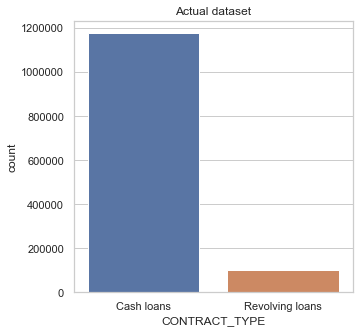

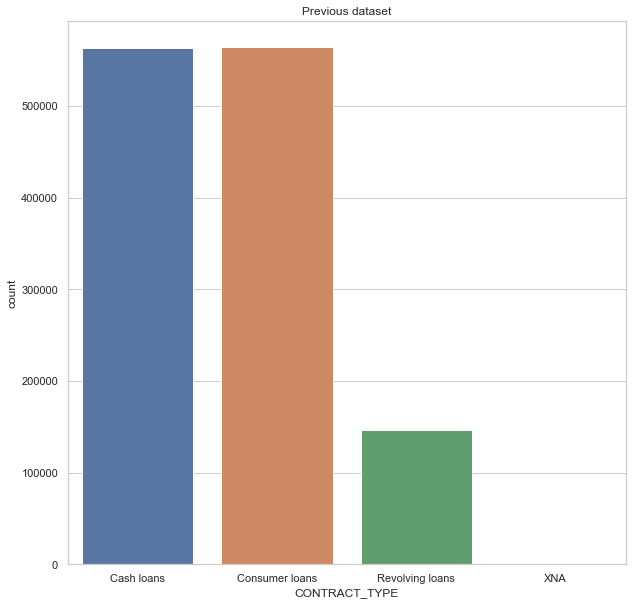

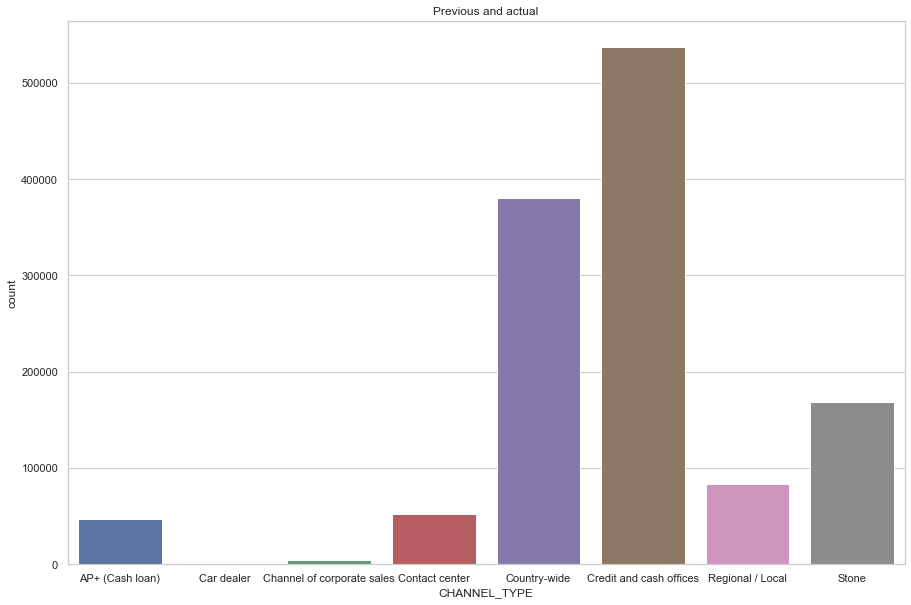

In [51]:
# We are creating the function to plot the bar chart for different columns

def plot_Barchart(col1,col1_rename,title,figsz1,figsz2):
    freqn_df1 = Merged_df.groupby([col1]).size().reset_index(name='count').rename(columns={col1:col1_rename})
    plt.figure(figsize=(figsz1,figsz2))
    sns.set(style="whitegrid")
    ax=sns.barplot(x=col1_rename,y='count',data=freqn_df1)
    plt.title(title)
    plt.show()

plot_Barchart('NAME_CONTRACT_TYPE_x','CONTRACT_TYPE',"Actual dataset",5,5)
plot_Barchart('NAME_CONTRACT_TYPE_y','CONTRACT_TYPE',"Previous dataset",10,10)
plot_Barchart('CHANNEL_TYPE','CHANNEL_TYPE',"Previous and actual",15,10)

In [52]:
# We are creating the function to plot the graphs for previous and against together

def Merged_df_plot(df, column_name, y_column, horizontal_layout=True, lb_rotate=False,):
    count = df[column_name].value_counts()
    df1 = pd.DataFrame({column_name: count.index,'Number of contracts': count.values})

    # We are calculating the percentage of target=1 per category value
    column_per = df[[column_name, 'TARGET']].groupby([column_name],as_index=False).mean()
    #printing column_per
    column_per.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (x1, x2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (x1, x2) = plt.subplots(nrows=2, figsize=(12,14))
    
    sns.set_color_codes("pastel")
    
    s = sns.barplot(ax=x1, x = column_name, y=y_column,data=df1)
    
    if(lb_rotate):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=x2, x = column_name, y='TARGET', order=column_per[column_name], data=column_per)
    if(lb_rotate):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

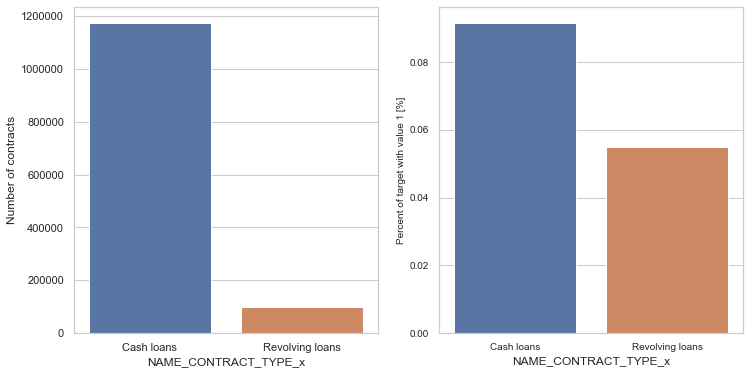

In [53]:
Merged_df_plot(Merged_df,'NAME_CONTRACT_TYPE_x',"Number of contracts")

In the application dataframe the amount of revolving loan is small as compared to Cash loans but the percentage of non payment for the revolving loans is comapritvely high.

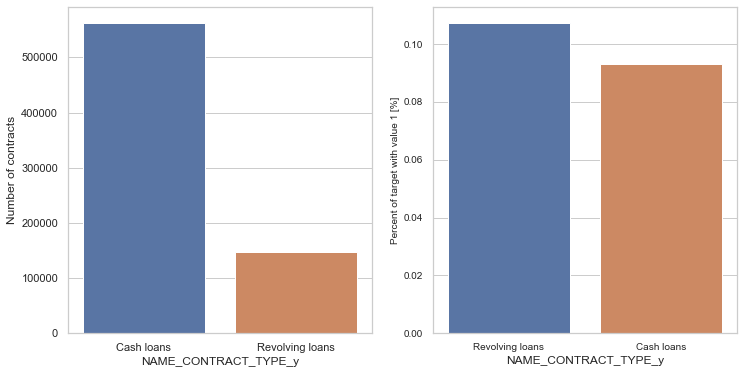

In [54]:
Filter_df = Merged_df[ (Merged_df['NAME_CONTRACT_TYPE_y'] != 'XNA') & (Merged_df['NAME_CONTRACT_TYPE_y'] != 'Consumer loans')]
Merged_df_plot(Filter_df,'NAME_CONTRACT_TYPE_y',"Number of contracts")

The amount of Revolving loans is small as compared to Cash loans but the percentage of amount of non payment for the revolving loans is higher than the cash loan.

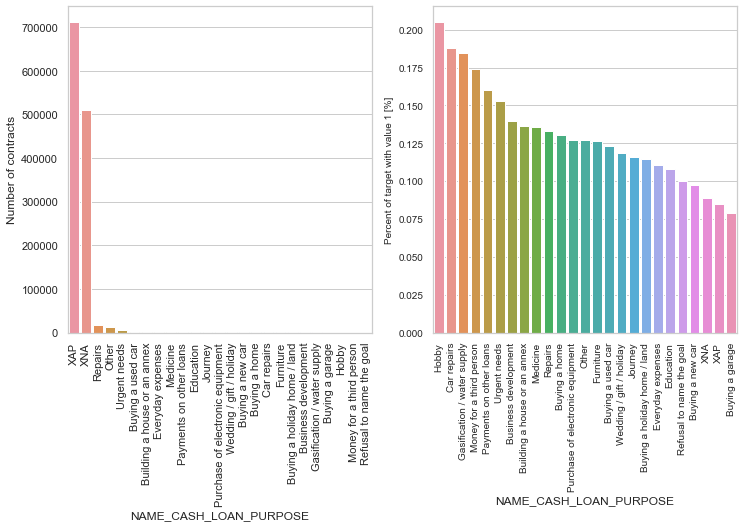

In [55]:
Merged_df_plot(Merged_df,'NAME_CASH_LOAN_PURPOSE', "Number of contracts",True, True)

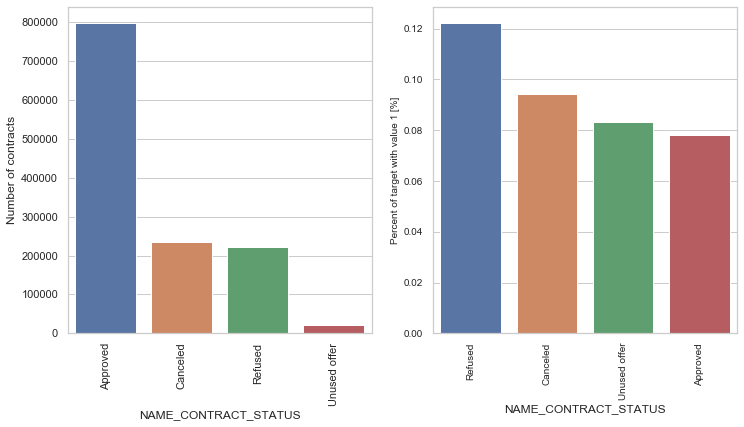

In [56]:
Merged_df_plot(Merged_df,'NAME_CONTRACT_STATUS',"Number of contracts", True, True)

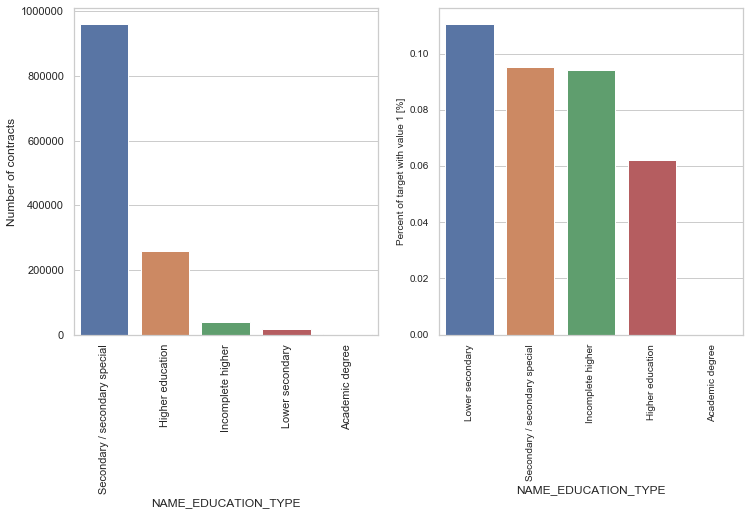

In [57]:
Merged_df_plot(Merged_df,'NAME_EDUCATION_TYPE',"Number of contracts", True, True)

We can clearly see that higher the education, higher is therepayment rate

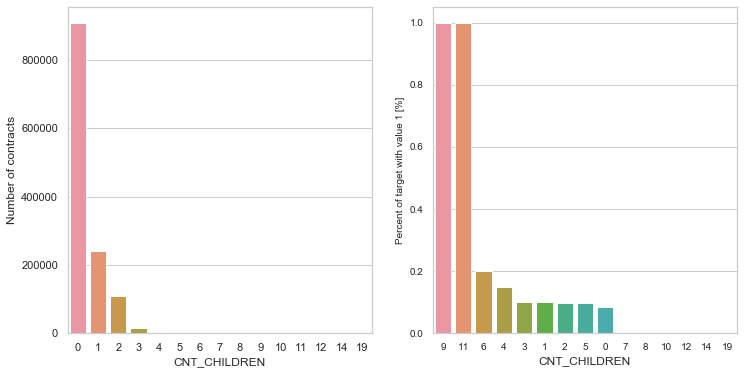

In [58]:
Merged_df_plot(Merged_df,'CNT_CHILDREN',"Number of contracts")

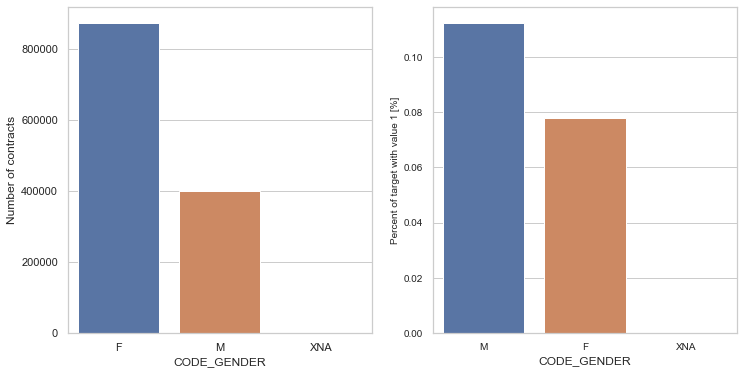

In [59]:
Merged_df_plot(Merged_df,'CODE_GENDER',"Number of contracts")

We can clearly see that the repayment rate of male is higher than the female

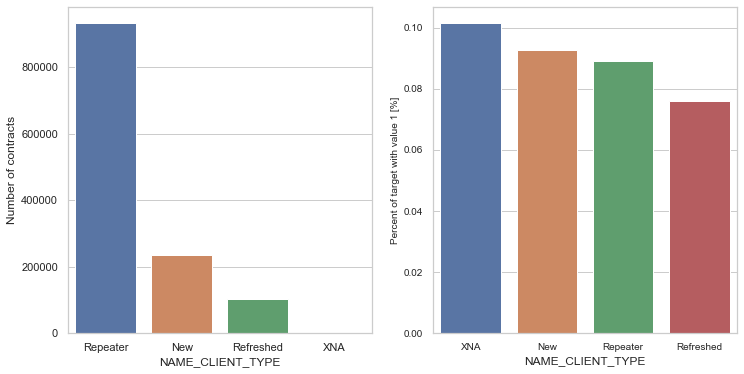

In [60]:
Merged_df_plot(Merged_df,'NAME_CLIENT_TYPE',"Number of contracts")

## Bivariate and Multivariate analysis on the merged dataframe

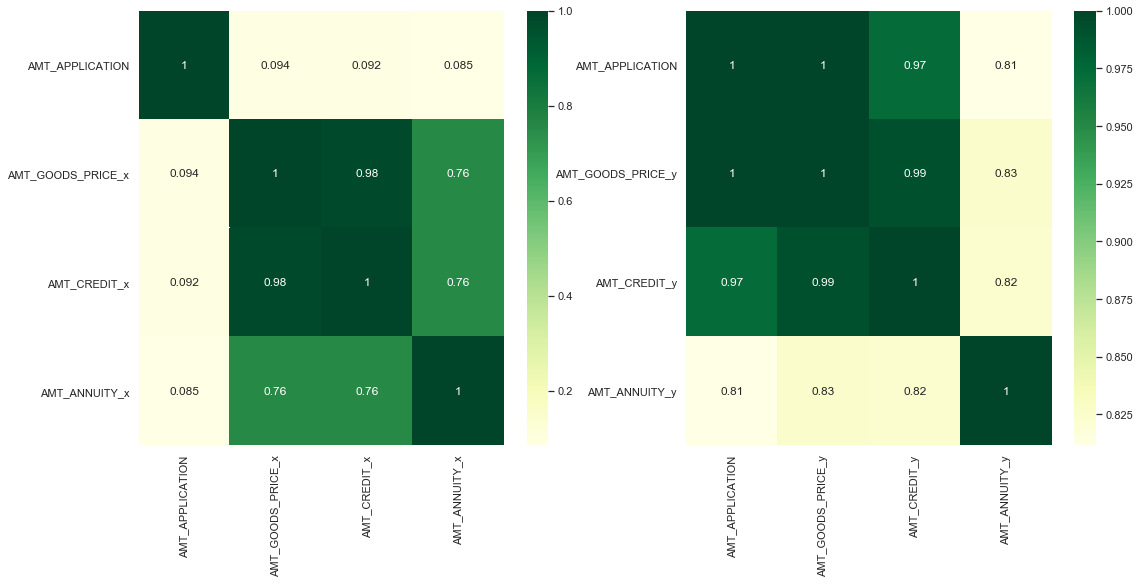

In [61]:
# application dataset
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
col_1=['AMT_APPLICATION','AMT_GOODS_PRICE_x','AMT_CREDIT_x','AMT_ANNUITY_x']
sns.heatmap(Merged_df[col_1].corr(), annot=True,cmap="YlGn")

# Previous application dataset
plt.subplot(1,2,2)
col_1=['AMT_APPLICATION','AMT_GOODS_PRICE_y','AMT_CREDIT_y','AMT_ANNUITY_y']
sns.heatmap(Merged_df[col_1].corr(), annot=True,cmap="YlGn")

plt.show()

The correlation is similar in both the dataset application dataset and previous application dataset

In [62]:
corr_columns=['AMT_APPLICATION','AMT_GOODS_PRICE_x','AMT_CREDIT_x','AMT_ANNUITY_x']

corr=Merged_df[corr_columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,AMT_APPLICATION,AMT_GOODS_PRICE_x,AMT_CREDIT_x,AMT_ANNUITY_x
AMT_APPLICATION,1.000000,0.093984,0.092108,0.084876
AMT_GOODS_PRICE_x,0.093984,1.000000,0.981932,0.755885
AMT_CREDIT_x,0.092108,0.981932,1.000000,0.756845
AMT_ANNUITY_x,0.084876,0.755885,0.756845,1.000000


Stats of application dataset

In [63]:
corr_columns=['AMT_APPLICATION','AMT_GOODS_PRICE_y','AMT_CREDIT_y','AMT_ANNUITY_y']

corr = Merged_df[corr_columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,AMT_APPLICATION,AMT_GOODS_PRICE_y,AMT_CREDIT_y,AMT_ANNUITY_y
AMT_APPLICATION,1.000000,0.999858,0.973336,0.811593
AMT_GOODS_PRICE_y,0.999858,1.000000,0.992813,0.826246
AMT_CREDIT_y,0.973336,0.992813,1.000000,0.823708
AMT_ANNUITY_y,0.811593,0.826246,0.823708,1.000000


Stats of previous application dataset

In [64]:
corr_columns=['AMT_APPLICATION','AMT_GOODS_PRICE_y','AMT_CREDIT_y','AMT_ANNUITY_y']

corr=Merged_df[corr_columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,AMT_APPLICATION,AMT_GOODS_PRICE_y,AMT_CREDIT_y,AMT_ANNUITY_y
AMT_APPLICATION,1.000000,0.999858,0.973336,0.811593
AMT_GOODS_PRICE_y,0.999858,1.000000,0.992813,0.826246
AMT_CREDIT_y,0.973336,0.992813,1.000000,0.823708
AMT_ANNUITY_y,0.811593,0.826246,0.823708,1.000000


The correlation between AMT_GOODS_PRICE and AMT_APPLICATION is much higher in previous year.
It means that the client ask for more credit in previous application whcih has been considered compared to new applications.
It also indicates that the policy is improved to limit the credits

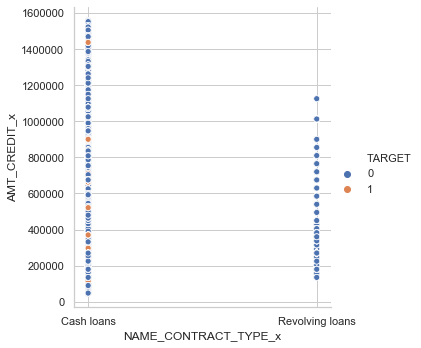

In [65]:
# Relative Plot for application data
 
sns.relplot(x="NAME_CONTRACT_TYPE_x", y="AMT_CREDIT_x",hue="TARGET", data=Merged_df)
plt.show()

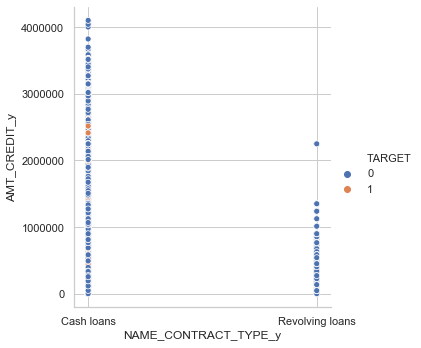

In [66]:
# Relative plot for previous application data 
# We are removing few contract types from previous data as it skews the graph

filtered_df = Merged_df[ (Merged_df['NAME_CONTRACT_TYPE_y'] != 'XNA') & (Merged_df['NAME_CONTRACT_TYPE_y'] != 'Consumer loans')]
sns.relplot(x="NAME_CONTRACT_TYPE_y", y="AMT_CREDIT_y",hue="TARGET", data=filtered_df)
plt.show()

### Relplot shows that the overall credit amount has increaed drastically in application data

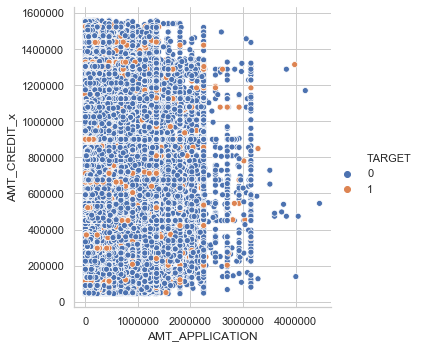

In [67]:
sns.relplot(x='AMT_APPLICATION', y="AMT_CREDIT_x",hue="TARGET",data=Merged_df)
plt.show()

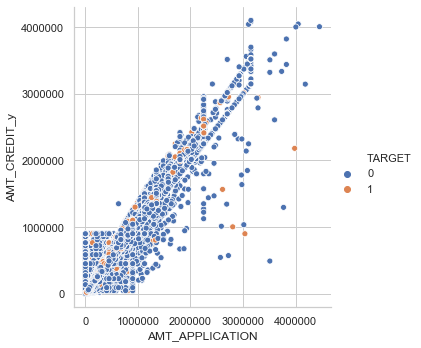

In [68]:
sns.relplot(x='AMT_APPLICATION', y="AMT_CREDIT_y",hue="TARGET",data=Merged_df)
plt.show()

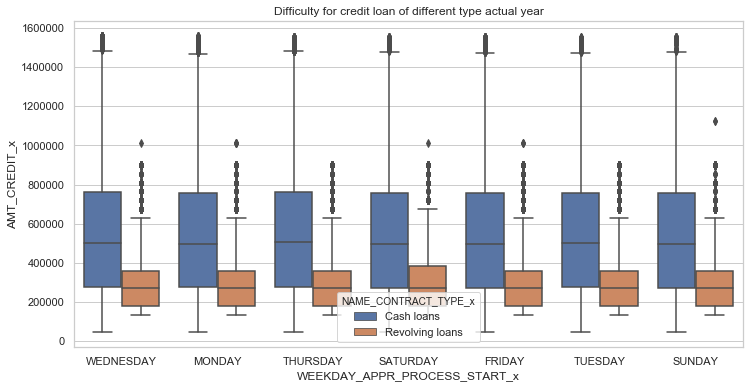

In [69]:
# We will create the boxplot for the merged dataframe

plt.figure(figsize=(12,6))

sns.boxplot(data=Merged_df,x='WEEKDAY_APPR_PROCESS_START_x',y='AMT_CREDIT_x',hue='NAME_CONTRACT_TYPE_x')
plt.title('Difficulty for credit loan of different type actual year')
plt.show()

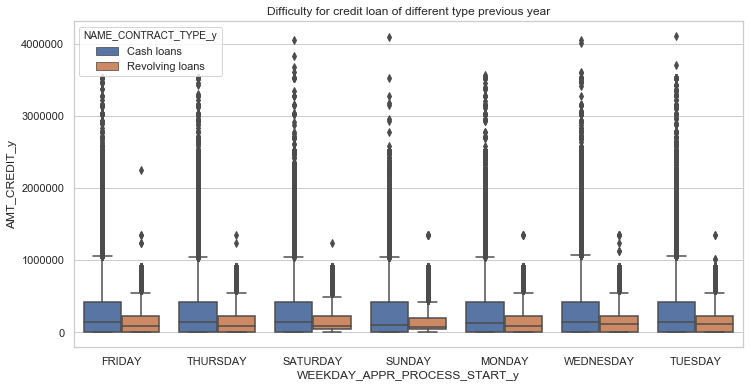

In [70]:
Filter_df = Merged_df[ (Merged_df['NAME_CONTRACT_TYPE_y'] != 'XNA') & (Merged_df['NAME_CONTRACT_TYPE_y'] != 'Consumer loans')]
 
plt.figure(figsize=(12,6))

sns.boxplot(data=Filter_df,x='WEEKDAY_APPR_PROCESS_START_y',y='AMT_CREDIT_y',hue='NAME_CONTRACT_TYPE_y')
plt.title('Difficulty for credit loan of different type previous year')
plt.show()

# Conclusion

From this Exploratory Data Analysis We have concluded the following points. The aim of this case study is to identify the defaulter and non defaulter.Our exploratory data analysis is going to reduce the risk of losing money while giving the loan to the customers.

1. Customers repeating are not likely to face payment issues because the credit is well balanced against AMT_APPLICATION.

2. There is no correlation between customers FAMILY_STATUS and the likelihood of paying the loan.

3. Returning customers have chance to get higher credit.

4. Customers with age between 25-30 are unlikely to be defaulter.

5. The customer who applied for loan are those customers having low income (upto 5 lakhs)

6. Working customers loan is approved most of the time while student and unemployed customers loan application is rejected mostly.

7. Most of the customer applied consumer and cash loan which share approximately equal number of approval and disapproval.

8. Customers who provide half number of required documents are facing issue in their loan approval and customer who provide all the documents are getting their approval immediately.
